In [4]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans


In [5]:
# Loading data
data = pd.read_csv("ObesityDataSet.csv")
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
# Editing data
data = data.replace({'Male': 1,'Female': 0,'yes': 1,'no': 0,'Always': 1,'Sometimes': 0.35,'Frequently': 0.7})

mtrans = ["Automobile", "Public_Transportation", "Motorbike", "Bike", "Walking"]

for i in mtrans:
    data[i] = 0
    data.loc[data["MTRANS"] == i, i] = 1
data.drop(columns=["MTRANS", "NObeyesdad"], inplace=True)




In [7]:
# converting data
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data.head()



,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Public_Transportation,Motorbike,Bike,Walking
0,-1.011914,-0.522124,-0.875589,-0.862558,0.472291,-2.759769,-0.785019,0.404153,-0.301646,-0.145900,-0.013073,-0.218272,-1.188039,0.561997,-1.419835,-0.525642,0.579721,-0.072375,-0.05768,-0.165078
1,-1.011914,-0.522124,-1.947599,-1.168077,0.472291,-2.759769,1.088342,0.404153,-0.301646,6.853997,1.618759,4.581439,2.339750,-1.080625,0.521583,-0.525642,0.579721,-0.072375,-0.05768,-0.165078
2,0.988227,-0.206889,1.054029,-0.366090,0.472291,-2.759769,-0.785019,0.404153,-0.301646,-0.145900,-0.013073,-0.218272,1.163820,0.561997,2.463001,-0.525642,0.579721,-0.072375,-0.05768,-0.165078
3,0.988227,0.423582,1.054029,0.015808,-2.117337,-2.759769,1.088342,0.404153,-0.301646,-0.145900,-0.013073,-0.218272,1.163820,-1.080625,2.463001,-0.525642,-1.724969,-0.072375,-0.05768,6.057758
4,0.988227,-0.364507,0.839627,0.122740,-2.117337,-2.759769,-0.785019,-2.167023,-0.301646,-0.145900,-0.013073,-0.218272,-1.188039,-1.080625,0.521583,-0.525642,0.579721,-0.072375,-0.05768,-0.165078


In [12]:
pca = PCA(n_components=2,random_state = 1) 
data_pca1 = pca.fit_transform(data)

In [13]:
km = KMeans(init="random", n_clusters=7)
km.fit(data_pca1)

print (km.cluster_centers_)


c:\Users\Katarina\anaconda3\envs\AIclasificator\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Katarina\anaconda3\envs\AIclasificator\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


[[-2.64668256  0.98068101]
 [-1.70553503  2.76880372]
 [ 0.58043212  2.64735566]
 [-0.7349809  -1.81001657]
 [ 1.56026836  0.16549927]
 [ 0.30847634 -0.69733097]
 [ 3.02961825  1.47257365]]


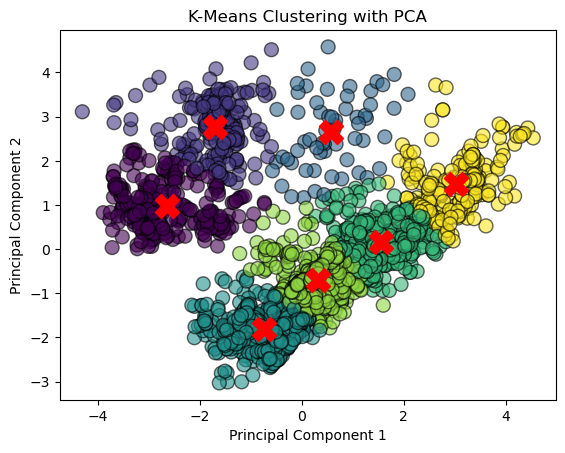

In [14]:
# Access the cluster labels and centers
labels = km.labels_
cluster_centers = km.cluster_centers_

# Plot the data points with colors corresponding to their cluster labels
plt.scatter(data_pca1[:, 0], data_pca1[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=100, alpha=0.6)

# Plot the cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red', marker='X')

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA')
plt.show()